In [1]:
import os,sys
import pandas as pd
import numpy as np
import pandas as pd

#importing for plotting the graphs
import matplotlib.pyplot as plt 
import seaborn as sns 

# Download NLP Toolkit for 
import nltk 

#using Beautiful Soup for filtering Html tags
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split

# Import the stop word list and text data sets, including stop words
from nltk.corpus import stopwords
#'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
from nltk.tokenize import WordPunctTokenizer

from wordcloud import WordCloud, STOPWORDS


In [2]:
#Reading the dataset using the "read_csv" function to read the labeled data

data = pd.read_csv("Engineering College review dataset - sheet3.csv")

In [3]:
print(data.columns)
print(data.shape)

Index(['College_Name', 'Reviews', 'Rating', 'Review Votes'], dtype='object')
(661, 4)


In [4]:
data.head()

,College_Name,Reviews,Rating,Review Votes
0,Pondicherry Engineering College,The best central University,5,0
1,Pondicherry Engineering College,Parking facility \nNature is good here\nCantee...,5,1
2,Pondicherry Engineering College,Pondicherry Engineering College (or PEC) is an...,5,2
3,Pondicherry Engineering College,Wonderful location good coaching..,4,0
4,Pondicherry Engineering College,One best engineering college in Pondicherry. I...,5,4


In [5]:
colleges = []
for item in data["College_Name"]:
    if (item in colleges):
        continue
    else:
        colleges.append(item)
        
print(len(colleges))

12


There are 12 engineering colleges in this data set

In [6]:
data["College_Name"].value_counts()

Sri Manakula Vinayagar Engineering College                    268
Manakula Vinayagar Institute of Technology                    199
Pondicherry Engineering College                                48
Rajiv Gandhi College of Engineering and Technology             40
Christ College of Engineering and Technology                   20
Dr Pauls Engineering Colleges                                  16
Sri Venkateshwara College of Engineering and Technology        15
Sri Ganesh College of Engineering and Technology ( SGCET )     14
Achariya College Of Engineering And Technology                 14
Alpha College Of Engineering And Technology                    13
Raak College of Engineering and Technology                      8
Shri Krishnaa College of Engineering and Technology             6
Name: College_Name, dtype: int64

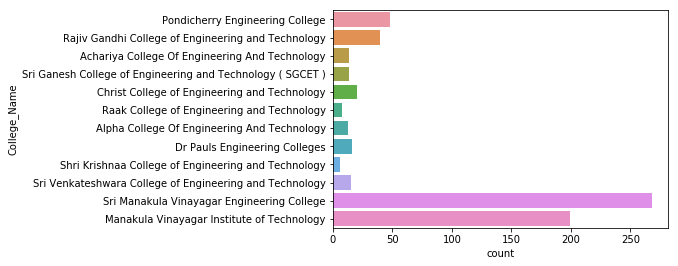

In [7]:
sns.countplot(data=data, y='College_Name')

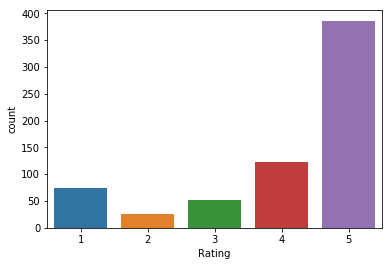

In [8]:
sns.countplot(data=data, x='Rating')

In [9]:
#identifying the number of columns and rows present in the data

data.shape

(661, 4)

In [10]:
# Creating a DataFrame by passing the dataset object to be converted to series-like for data-cleaning and
# pre-processsing

data_df = pd.DataFrame(data)

print(data_df.head(10))

                      College_Name  \
0  Pondicherry Engineering College   
1  Pondicherry Engineering College   
2  Pondicherry Engineering College   
3  Pondicherry Engineering College   
4  Pondicherry Engineering College   
5  Pondicherry Engineering College   
6  Pondicherry Engineering College   
7  Pondicherry Engineering College   
8  Pondicherry Engineering College   
9  Pondicherry Engineering College   

                                             Reviews  Rating  Review Votes  
0                        The best central University       5             0  
1  Parking facility \nNature is good here\nCantee...       5             1  
2  Pondicherry Engineering College (or PEC) is an...       5             2  
3                 Wonderful location good coaching..       4             0  
4  One best engineering college in Pondicherry. I...       5             4  
5                 Nice place for learning technology       5             0  
6  It is one of the best colleges in Puduc

In [11]:
import warnings
warnings.filterwarnings('ignore')

data_df = data_df[pd.notnull(data_df['Reviews'])] 

data_df['Review Votes'].replace("", 0, inplace=True )

data_df['College_Name'] = data_df.ix[~(data_df['College_Name'] == "")]

In [12]:
#check if we have any null reviews in our dataframe after the data cleaning

data_df['Reviews'].isnull().any()

False

In [13]:
#reset_index to drop the existing index and replace with new index

data_df.reset_index(drop=True, inplace=True)

In [14]:
#displaying the data with new index

print (data_df.head(10))

                      College_Name  \
0  Pondicherry Engineering College   
1  Pondicherry Engineering College   
2  Pondicherry Engineering College   
3  Pondicherry Engineering College   
4  Pondicherry Engineering College   
5  Pondicherry Engineering College   
6  Pondicherry Engineering College   
7  Pondicherry Engineering College   
8  Pondicherry Engineering College   
9  Pondicherry Engineering College   

                                             Reviews  Rating  Review Votes  
0                        The best central University       5             0  
1  Parking facility \nNature is good here\nCantee...       5             1  
2  Pondicherry Engineering College (or PEC) is an...       5             2  
3                 Wonderful location good coaching..       4             0  
4  One best engineering college in Pondicherry. I...       5             4  
5                 Nice place for learning technology       5             0  
6  It is one of the best colleges in Puduc

In [15]:
top = pd.pivot_table(data_df,index=['College_Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
top = top.sort_values(by=('sum', 'Rating'), ascending = False)

top.head(10)

sum               \
                                                   Rating Review Votes   
College_Name                                                             
Sri Manakula Vinayagar Engineering College           1216         1915   
Manakula Vinayagar Institute of Technology            786          116   
Pondicherry Engineering College                       212           50   
Rajiv Gandhi College of Engineering and Technology    123          299   
Christ College of Engineering and Technology           69           14   
Sri Venkateshwara College of Engineering and Te...     65           19   
Achariya College Of Engineering And Technology         54           18   
Alpha College Of Engineering And Technology            45           13   
Dr Pauls Engineering Colleges                          38           11   
Raak College of Engineering and Technology             34            8   

                                                        mean               
                                                      Rating Review Votes  
College_Name                                                               
Sri Manakula Vinayagar Engineering College          4.537313     7.145522  
Manakula Vinayagar Institute of Technology          3.949749     0.582915  
Pondicherry Engineering College                     4.416667     1.041667  
Rajiv Gandhi College of Engineering and Technology  3.075000     7.475000  
Christ College of Engineering and Technology        3.450000     0.700000  
Sri Venkateshwara College of Engineering and Te...  4.333333     1.266667  
Achariya College Of Engineering And Technology      3.857143     1.285714  
Alpha College Of Engineering And Technology         3.461538     1.000000  
Dr Pauls Engineering Colleges                       2.375000     0.687500  
Raak College of Engineering and Technology          4.250000     1.000000

Top 10 colleges in the data set sorted on the basis of sum of Ratings.

Text(0.5, 1.0, 'Reviews')

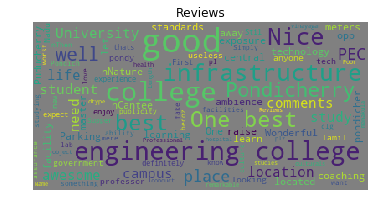

In [16]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='gray',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Reviews']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews')

In [17]:
college_train, college_test =  train_test_split(data_df, test_size = .2, random_state=0)

In [18]:
import warnings
warnings.filterwarnings('ignore')

reviews_train = []

#coverting all the data within the review column to string datatypes
college_train['Reviews'] = college_train['Reviews'].astype(str)


In [19]:
#reset_index to drop the existing index and replace with new index

college_train.reset_index(drop=True, inplace=True)

In [20]:
#using BeautifulSoup to remove all the html tags that might be present in the review column of the amazon_train dataframe
for i in range (0,len(college_train)):
   reviews_train.append(BeautifulSoup(college_train["Reviews"][i],"lxml").get_text())

In [21]:
print(reviews_train[1])

Good infrastructure with well established laboratories, Highly qualified and experienced faculties, excellent placement


NLTK function to find sentiment value and sentiment.

In [22]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)


In [23]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yosnalab/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
sample = college_train['Reviews'][50]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Very good college with good atmosphere and infrastructure ........good placement records.......good teaching ........well trained staffs........😊😊😊
Sentiment: 
0.7


In [25]:
all_sent_values = []
all_sentiments = []

In [26]:
#for i in range(0,661):

for i in range(0,len(college_train['Reviews'])): 
    all_sent_values.append(sentiment_value(reviews_train[i])) # 8 minutes for calculation


In [27]:
len(all_sent_values)

528

In [28]:
temp_data = data_df[0:len(college_train['Reviews'])]

In [29]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,len(college_train['Reviews'])):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)


In [30]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

In [31]:
temp_data.head(10)

,College_Name,Reviews,Rating,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,Pondicherry Engineering College,The best central University,5,0,4,Positive
1,Pondicherry Engineering College,Parking facility \nNature is good here\nCantee...,5,1,5,V.Positive
2,Pondicherry Engineering College,Pondicherry Engineering College (or PEC) is an...,5,2,5,V.Positive
3,Pondicherry Engineering College,Wonderful location good coaching..,4,0,3,Neutral
4,Pondicherry Engineering College,One best engineering college in Pondicherry. I...,5,4,5,V.Positive
5,Pondicherry Engineering College,Nice place for learning technology,5,0,5,V.Positive
6,Pondicherry Engineering College,It is one of the best colleges in Puducherry. ...,4,9,5,V.Positive
7,Pondicherry Engineering College,Only the best engineering college in pondicher...,5,1,4,Positive
8,Pondicherry Engineering College,one of the best colleges...you are the master ...,5,0,5,V.Positive
9,Pondicherry Engineering College,An awesome campus,4,1,2,Negative


In [32]:
#find accuracy
counter = 0
for i in range(0,len(college_train['Reviews'])):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1
    
print(counter)

180


In [33]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

percent_accuracy = accuracy*100

print(percent_accuracy)


65.9090909090909


In [34]:
product_name = []
for item in temp_data["College_Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)
        
len(product_name)

12

In [35]:
testing2 = pd.pivot_table(temp_data,index=['College_Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum               \
                                                   Rating Review Votes   
College_Name                                                             
Sri Manakula Vinayagar Engineering College           1216         1915   
Manakula Vinayagar Institute of Technology            250           47   
Pondicherry Engineering College                       212           50   
Rajiv Gandhi College of Engineering and Technology    123          299   
Christ College of Engineering and Technology           69           14   
Sri Venkateshwara College of Engineering and Te...     65           19   
Achariya College Of Engineering And Technology         54           18   
Alpha College Of Engineering And Technology            45           13   
Dr Pauls Engineering Colleges                          38           11   
Raak College of Engineering and Technology             34            8   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
College_Name                                                                   
Sri Manakula Vinayagar Engineering College                    1129  4.537313   
Manakula Vinayagar Institute of Technology                     277  3.787879   
Pondicherry Engineering College                                210  4.416667   
Rajiv Gandhi College of Engineering and Technology             166  3.075000   
Christ College of Engineering and Technology                    89  3.450000   
Sri Venkateshwara College of Engineering and Te...              61  4.333333   
Achariya College Of Engineering And Technology                  55  3.857143   
Alpha College Of Engineering And Technology                     54  3.461538   
Dr Pauls Engineering Colleges                                   66  2.375000   
Raak College of Engineering and Technology                      38  4.250000   

                                                                 \
                                                   Review Votes   
College_Name                                                      
Sri Manakula Vinayagar Engineering College             7.145522   
Manakula Vinayagar Institute of Technology             0.712121   
Pondicherry Engineering College                        1.041667   
Rajiv Gandhi College of Engineering and Technology     7.475000   
Christ College of Engineering and Technology           0.700000   
Sri Venkateshwara College of Engineering and Te...     1.266667   
Achariya College Of Engineering And Technology         1.285714   
Alpha College Of Engineering And Technology            1.000000   
Dr Pauls Engineering Colleges                          0.687500   
Raak College of Engineering and Technology             1.000000   

                                                                    
                                                   SENTIMENT_VALUE  
College_Name                                                        
Sri Manakula Vinayagar Engineering College                4.212687  
Manakula Vinayagar Institute of Technology                4.196970  
Pondicherry Engineering College                           4.375000  
Rajiv Gandhi College of Engineering and Technology        4.150000  
Christ College of Engineering and Technology              4.450000  
Sri Venkateshwara College of Engineering and Te...        4.066667  
Achariya College Of Engineering And Technology            3.928571  
Alpha College Of Engineering And Technology               4.153846  
Dr Pauls Engineering Colleges                             4.125000  
Raak College of Engineering and Technology                4.750000

In [36]:
testing3 = pd.pivot_table(temp_data,index=['College_Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
College_Name                                                             
Sri Manakula Vinayagar Engineering College           1216         1915   
Manakula Vinayagar Institute of Technology            250           47   
Pondicherry Engineering College                       212           50   
Rajiv Gandhi College of Engineering and Technology    123          299   
Christ College of Engineering and Technology           69           14   
Sri Venkateshwara College of Engineering and Te...     65           19   
Achariya College Of Engineering And Technology         54           18   
Alpha College Of Engineering And Technology            45           13   
Dr Pauls Engineering Colleges                          38           11   
Raak College of Engineering and Technology             34            8   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
College_Name                                                                   
Sri Manakula Vinayagar Engineering College                    1129  4.537313   
Manakula Vinayagar Institute of Technology                     277  3.787879   
Pondicherry Engineering College                                210  4.416667   
Rajiv Gandhi College of Engineering and Technology             166  3.075000   
Christ College of Engineering and Technology                    89  3.450000   
Sri Venkateshwara College of Engineering and Te...              61  4.333333   
Achariya College Of Engineering And Technology                  55  3.857143   
Alpha College Of Engineering And Technology                     54  3.461538   
Dr Pauls Engineering Colleges                                   66  2.375000   
Raak College of Engineering and Technology                      38  4.250000   

                                                                 \
                                                   Review Votes   
College_Name                                                      
Sri Manakula Vinayagar Engineering College             7.145522   
Manakula Vinayagar Institute of Technology             0.712121   
Pondicherry Engineering College                        1.041667   
Rajiv Gandhi College of Engineering and Technology     7.475000   
Christ College of Engineering and Technology           0.700000   
Sri Venkateshwara College of Engineering and Te...     1.266667   
Achariya College Of Engineering And Technology         1.285714   
Alpha College Of Engineering And Technology            1.000000   
Dr Pauls Engineering Colleges                          0.687500   
Raak College of Engineering and Technology             1.000000   

                                                                    
                                                   SENTIMENT_VALUE  
College_Name                                                        
Sri Manakula Vinayagar Engineering College                4.212687  
Manakula Vinayagar Institute of Technology                4.196970  
Pondicherry Engineering College                           4.375000  
Rajiv Gandhi College of Engineering and Technology        4.150000  
Christ College of Engineering and Technology              4.450000  
Sri Venkateshwara College of Engineering and Te...        4.066667  
Achariya College Of Engineering And Technology            3.928571  
Alpha College Of Engineering And Technology               4.153846  
Dr Pauls Engineering Colleges                             4.125000  
Raak College of Engineering and Technology                4.750000